# Using Logistic Regression to classify the Diabetes dataset with sklearn

In [15]:
# Using Logistic Regression to classify the Diabetes dataset with sklearn
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Load dataset
dataset = pd.read_csv('../dataset/diabetes_selected_norm.csv')

In [17]:
# Split dataset into training and test set
X = dataset.iloc[:, 0:len(dataset.columns)-1].values
y = dataset.iloc[:, len(dataset.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Create the classifier
classifier = LogisticRegression(random_state=0, class_weight={0:0.6, 1:1.7})
classifier.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.6, 1: 1.7}, random_state=0)

In [19]:
# Predict the test set results
y_pred = classifier.predict(X_test)

Accuracy:	 0.7463768115942029
Precision:	 0.6231884057971014
Recall:		 0.8269230769230769
F1 score:	 0.7107438016528926


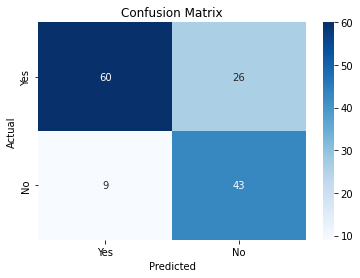

In [20]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:\t', accuracy)

# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

# Print the results
print('Precision:\t', precision)
print('Recall:\t\t', recall)
print('F1 score:\t', f1)


# Visualize confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77        86
           1       0.62      0.83      0.71        52

    accuracy                           0.75       138
   macro avg       0.75      0.76      0.74       138
weighted avg       0.78      0.75      0.75       138



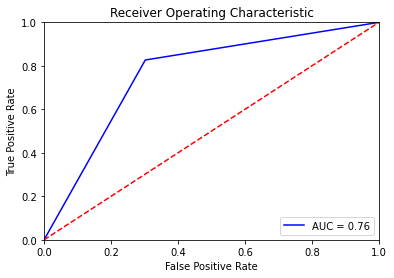

In [24]:
# Plot AUC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()